# サンプリング数によるセンサデータのばらつき取得

ライブラリの取り込み

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import codecs

# グラフのデフォルトフォントを指定
plt.rcParams['font.size'] = 18
# データフレームの桁数設定
pd.options.display.precision = 3

CSVファイルのヘッダ部分を読み飛ばすためヘッダの行数を取得（ファイルはshift-jis）

In [98]:
csv_path_1 = './0708/'
file_name ='1024_zeo'
csv_path = csv_path_1 + file_name    # 後で DF を名前を変えて保存するため'.csv'を含めない

fin = codecs.open(csv_path + '.csv', "r", "shift_jis")
data = fin.readline()
arry = data.split(',')
if not('BeginHeader' in arry[0]):
    print('測定データではありません。')
else:
    skip_length = int(arry[1])
    print(data, end='')
    for i in range(skip_length + 3):
        print(fin.readline(), end='')
fin.close()

#BeginHeader,71,,,,,,,
#FormatType,NR-600\NORMAL,,,,,,,
#FormatVersion,R4.00.00,,,,,,,
タイトル,,,,,,,,
ユニット番号,UNIT0,UNIT1,UNIT2,MASTER,,,,
ユニット種別,NR-U60,(1)HV,(2)HV,NR-600,,,,
,,,,,,,,
計測モード,ノーマルモード,,,,,,,
収集開始日時,2022/7/8 10:37,0,,,,,,
サンプリング周期,10ms,,,,,,,
データ数,4000,,,,,,,
保存オプション,標準,,,,,,,
,,,,,,,,
ユニット種別共通,,,,,,,,
ユニット種別名,NR-HV04共通,,,,,,,
実サンプリング周期,10ms,,,,,,,
計測機能設定,***,,,,,,,
AD積分時間,***,,,,,,,
ｱﾝﾁｴｲﾘｱｼﾝｸﾞﾌｨﾙﾀ,***,,,,,,,
断線検出値,***,,,,,,,
デジタルフィルタ,ON,,,,,,,
その他,,,,,,,,
デジタルフィルタ,***,,,,,,,
停止予測,***,,,,,,,
,,,,,,,,
トリガ条件,,,,,,,,
マニュアルトリガ,OFF,,,,,,,
外部トリガ入力,OFF,,,,,,,
エッジトリガ,OFF,,,,,,,
エッジトリガ対象ユニット,なし,,,,,,,
プリトリガ/ポストトリガ,***,,,,,,,
ポイント数,***,,,,,,,
,,,,,,,,
判定/アラーム条件,,,,,,,,
出力モード,保持する,,,,,,,
バーンアウトアラーム,***,,,,,,,
断線アラーム,***,,,,,,,
,,,,,,,,
チャンネル条件,,,,,,,,
チャンネル番号,,(1)HV-CH01,(1)HV-CH02,(1)HV-CH03,(1)HV-CH04,(2)HV-CH01,(2)HV-CH02,(2)HV-CH03
波形名,,Channel01,Channel02,Channel03,Channel04,Channel01,Channel02,Channel03
入力レンジ,,±10V,±10V,±10V,±10V,±10V,±10V,±10V
単位,,mm,mm,mm,mm,mm,mm,mm
計測機能,,,,,

CSVファイルの取り込み ヘッダ部スキップ、読み込み列指定、ヘッダ変更
※体験版で実際は動かないので、低電圧と高電圧を読み込む

In [99]:
header = ['R_d', 'R_h', 'T_d', 'T_h' ,'Guide', 'RoadL', 'RoadR']
df = pd.read_csv(csv_path + '.csv', skiprows=skip_length, usecols=[2,3,4,5,6,7,8], names=header, header=None, encoding='shift_jis')
df

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
0,-0.001,0.001,-0.001,0.011,-0.003,0.003,0.000
1,-0.001,0.001,-0.001,0.011,-0.003,0.000,0.003
2,-0.001,0.001,-0.001,0.010,-0.006,0.003,0.003
3,-0.002,0.001,-0.001,0.011,-0.003,0.003,0.003
4,-0.001,0.001,-0.001,0.011,-0.003,0.003,0.003
...,...,...,...,...,...,...,...
3995,-0.001,0.001,-0.001,-0.010,-0.003,0.003,0.006
3996,-0.002,0.001,-0.001,-0.010,-0.003,0.003,0.003
3997,-0.001,0.001,-0.001,-0.009,0.000,0.003,0.003
3998,-0.001,0.001,-0.001,-0.010,-0.003,0.000,0.006


In [100]:
# df = df.iloc[:3000,:]    # 3000行以降の外れ値をカット
df.describe()

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
count,4.000e+03,4000.000,4.000e+03,4000.000,4000.000,4000.000,4000.000
mean,-1.199e-03,0.002,-9.950e-04,-0.004,0.002,0.002,0.002
std,3.997e-04,0.011,1.161e-04,0.006,0.003,0.001,0.002
min,-2.000e-03,0.000,-2.000e-03,-0.010,-0.006,-0.003,-0.003
25%,-1.000e-03,0.001,-1.000e-03,-0.010,0.000,0.000,0.000
50%,-1.000e-03,0.001,-1.000e-03,0.000,0.003,0.003,0.003
75%,-1.000e-03,0.001,-1.000e-03,0.001,0.003,0.003,0.003
max,-1.000e-03,0.092,0.000e+00,0.011,0.009,0.006,0.006


Text(0.5, 0, 'difference [mm]')

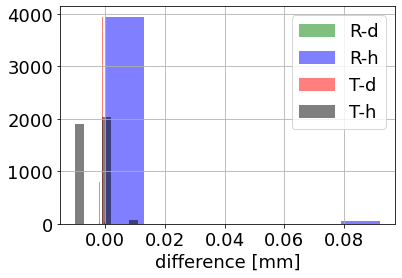

In [101]:
bins = 7
xlim = .1

df["R_d"].hist(bins=bins, color="green", label = 'R-d', alpha=0.5)
df["R_h"].hist(bins=bins, color="blue", label = 'R-h', alpha=0.5)
df["T_d"].hist(bins=bins, color="red", label = 'T-d', alpha=0.5)
# df["S_h"].hist(bins=bins, color="red", label = 'S-h', alpha=0.5)
df["T_h"].hist(bins=bins, color="black", label = 'T-h', alpha=0.5)

plt.legend()
plt.xlabel("difference [mm]")
#plt.xlim(-xlim, xlim)

Text(0, 0.5, 'difference [mm]')

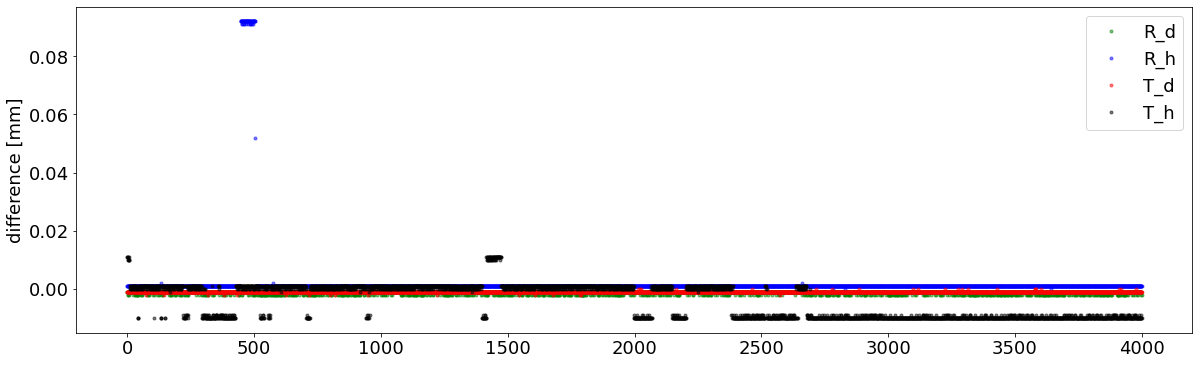

In [102]:
ylim = 1

df["R_d"].plot(style="g.", label = 'R_d', alpha=0.5, figsize=(20, 6))
df["R_h"].plot(style="b.", label = 'R_h', alpha=0.5)
# df["S_h"].plot(style="r.", label = 'S_h', alpha=0.5)
df["T_d"].plot(style="r.", label = 'T_d', alpha=0.5)
df["T_h"].plot(style="k.", label = 'T_h', alpha=0.5)

plt.legend()
plt.ylabel("difference [mm]")
#plt.ylim(-ylim, ylim)

Text(0.5, 0, 'defference [mm]')

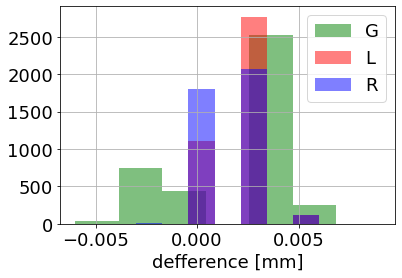

In [103]:
bins = 7
xlim = .1

df["Guide"].hist(bins=bins, color="green", label = 'G', alpha=0.5)
df["RoadL"].hist(bins=bins, color="red", label = 'L', alpha=0.5)
df["RoadR"].hist(bins=bins, color="blue", label = 'R', alpha=0.5)

plt.legend()
plt.xlabel("defference [mm]")
#plt.xlim(-xlim, xlim)

Text(0, 0.5, 'difference [mm]')

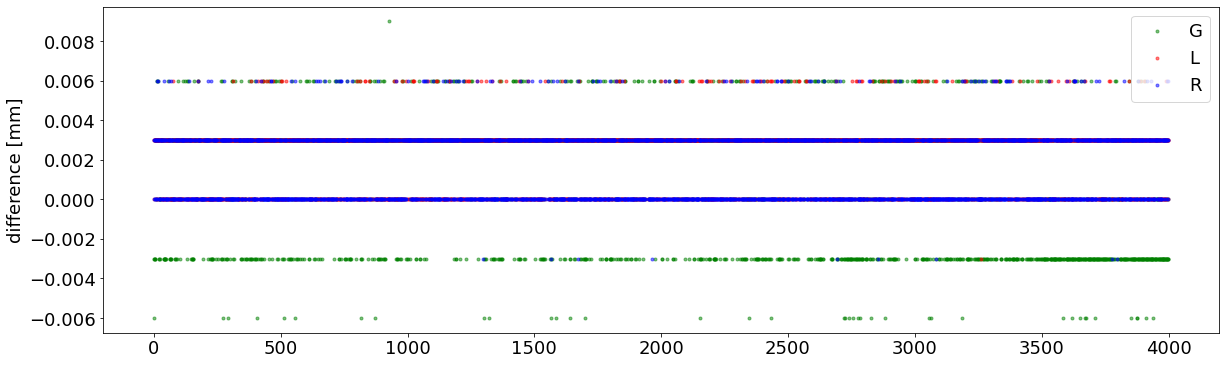

In [104]:
df["Guide"].plot(style="g.", label = 'G', alpha=0.5, figsize=(20,6))
df["RoadL"].plot(style="r.", label = 'L', alpha=0.5)
df["RoadR"].plot(style="b.", label = 'R', alpha=0.5)

ylim = 1
plt.legend()
plt.ylabel("difference [mm]")
# plt.ylim(-ylim, ylim)
# plt.xlim(0, 200)

DF を名前を変えてcsv保存

In [105]:
df.to_csv(csv_path + "_0_data.csv", index=False)

# 手動測定値の入力

In [106]:
# (R_h, R_d, T_h, T_d)

# 基準点の測定値
origin_08 = (1, 0, 0, 0)
origin_08H = (2, -4, 2, -2)

# 測定ゲージによる測定値　key = file_name

manual_08 = {'1_zeo': (1, 0, 0, 0),
             '16_zeo': (1, 0, 0, 0),
             '256_zeo_2': (1, 0, 0, 0),
             '1024_zeo': (1, 0, 0, 0),
             '1_294': (2, 0, -1, 0),
             '1_293': (-1, -1, 0, -3),
             '1_292': (-1, 2, 4, -1),
             '1_291': (4, -1, 4, 0),
             '1_hazure': (0, 2, 3, -2)
            }

manual_08H = {'1_zero': (2, -4, 2, -2),
              '103': (4, 0, 4, -2),
              '102': (0, 0, 0, -2),
              '101': (2, -2, 3, -1),
              '100': (0, -1, 1, 0),
              '078': (-3, 0, -2, 0),
              '079': (0, 0, 3, 4),
              '080': (1, -2, 3, 0),
              '081': (1, -2, 1, 0),
              '082': (2, 0, 2, 1),
              '083': (0, 0, 2, -1),
              '084': (-1, 3, 0, -1),
              '085': (-3, 0, 0, 0),
              '086': (-1, -2, 1, 0)
             }

if csv_path_1 == './0708/':
    origin = origin_08
    manual = manual_08
    
elif csv_path_1 == './0708H/':
    origin = origin_08H
    manual = manual_08H


In [107]:
# 基準点補正後の手動測定の値
df["R_h_man"] = manual[file_name][0] - origin[0]
df["R_d_man"] = manual[file_name][1] - origin[1]
df["T_h_man"] = manual[file_name][2] - origin[2]
df["T_d_man"] = manual[file_name][3] - origin[3]

In [108]:
df2 = df[["R_h", "R_d", "T_h", "T_d", "Guide", "RoadL", "RoadR",
           "R_h_man", "R_d_man", "T_h_man", "T_d_man"]]
df2

,R_h,R_d,T_h,T_d,Guide,RoadL,RoadR,R_h_man,R_d_man,T_h_man,T_d_man
0,0.001,-0.001,0.011,-0.001,-0.003,0.003,0.000,0,0,0,0
1,0.001,-0.001,0.011,-0.001,-0.003,0.000,0.003,0,0,0,0
2,0.001,-0.001,0.010,-0.001,-0.006,0.003,0.003,0,0,0,0
3,0.001,-0.002,0.011,-0.001,-0.003,0.003,0.003,0,0,0,0
4,0.001,-0.001,0.011,-0.001,-0.003,0.003,0.003,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,0.001,-0.001,-0.010,-0.001,-0.003,0.003,0.006,0,0,0,0
3996,0.001,-0.002,-0.010,-0.001,-0.003,0.003,0.003,0,0,0,0
3997,0.001,-0.001,-0.009,-0.001,0.000,0.003,0.003,0,0,0,0
3998,0.001,-0.001,-0.010,-0.001,-0.003,0.000,0.006,0,0,0,0


In [109]:
print(file_name)
df.describe()

1024_zeo


,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR,R_h_man,R_d_man,T_h_man,T_d_man
count,4.000e+03,4000.000,4.000e+03,4000.000,4000.000,4000.000,4000.000,4000.0,4000.0,4000.0,4000.0
mean,-1.199e-03,0.002,-9.950e-04,-0.004,0.002,0.002,0.002,0.0,0.0,0.0,0.0
std,3.997e-04,0.011,1.161e-04,0.006,0.003,0.001,0.002,0.0,0.0,0.0,0.0
min,-2.000e-03,0.000,-2.000e-03,-0.010,-0.006,-0.003,-0.003,0.0,0.0,0.0,0.0
25%,-1.000e-03,0.001,-1.000e-03,-0.010,0.000,0.000,0.000,0.0,0.0,0.0,0.0
50%,-1.000e-03,0.001,-1.000e-03,0.000,0.003,0.003,0.003,0.0,0.0,0.0,0.0
75%,-1.000e-03,0.001,-1.000e-03,0.001,0.003,0.003,0.003,0.0,0.0,0.0,0.0
max,-1.000e-03,0.092,0.000e+00,0.011,0.009,0.006,0.006,0.0,0.0,0.0,0.0


結果のCSV出力

In [110]:
# df2.to_csv(csv_path + "_describe.csv", index=False)

<AxesSubplot:>

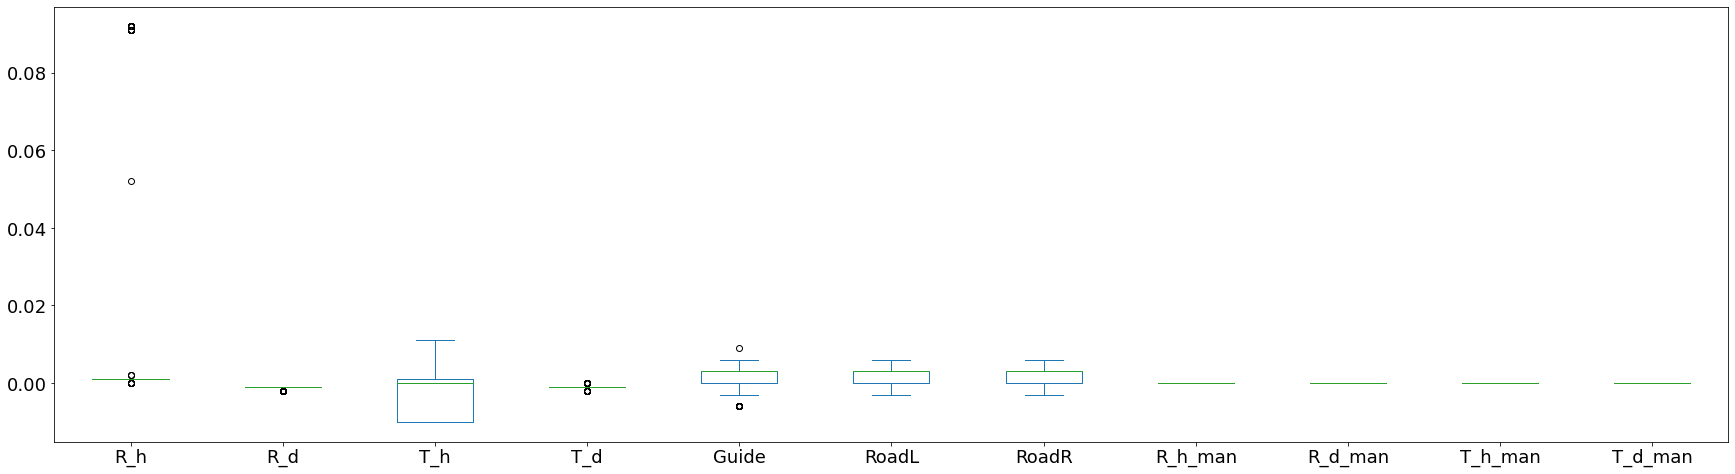

In [111]:
df2.plot.box(figsize=(30,8))
#plt.ylim(-0.1, 0.1)